In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)

# Introduction to Working with U.S. Census Data in Python

## [Darren Erik Vengroff, Ph.D.](https://www.linkedin.com/in/vengroff/) 

## <font color="#FA0008">If you would like to run this notebook live during the tutorial, visit <a href="https://github.com/vengroff/censusdis-tutorial" target="_blank">https://github.com/vengroff/censusdis-tutorial</a> and</font>

<center><img src="./images/launch-notebook.png" width="720"/></center>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### What Data Does the U.S. Census Publish?

- 1,300+ data sets of various vintages
- Tens of thousands of variables
  - Demographic
  - Economic
  - Social

### Where is U.S. Census Data Useful?

- data journalism
- social science
- allocation of public and private resources
- data activism and advocacy
- marketing and strategic planning

### How Can we Access it from Python?

- With `censusdis`

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Background and History

<table>
    <tr>
        <td rowspan="3" width="240">
            <a href="https://www.communitycoalitiononrace.org/" target="_blank">
              <img src="./images/communitycoalitiononrace_logo.png" alt="Community Coalition on Race Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2020</td>
        <td style="font-size:16pt">
            CCR migrated from CD-ROM and spreadsheet census data to the US. Census API using 
            the <a href="https://github.com/jtleider/censusdata">censusdata</a> Python package
            and some internal interface code.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2021</td>
        <td style="font-size:16pt">
            Developed <a href="https://github.com/vengroff/divintseg">divintseg</a>, Python
            package for computing diversity, integration, and segregation metrics.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2022</td>
        <td style="font-size:16pt">
            Censusdata support ended. We rewrote CCR's internal interface as the open source <a href="https://github.com/vengroff/censusdis">censusdis</a> package to load data and compute metrics. We added mapping and other utilities to make it a one stop shop.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.twosigma.com/" target="_blank">
                <img src="./images/ts-logo.svg" alt="Two Sigma Logo" width="200"/>
            </a>
            <br/>
            <a href="https://www.twosigma.com/data-clinic/" target="_blank">
                <img src="./images/logo-ts-data-clinic.png" alt="TS Data Clinic Logo" width="200"/>
            </a>
            <br/>
            <a href="https://housingnavigatorma.org/" target="_blank">
                <img src="./images/housing-nav-logo.svg" alt="mybinder.org" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            Used censusdis along with proprietary data to analyze affordable
            housing availability and need in Massachusetts.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://datapinions.com/" target="_blank">
                <img src="https://datapinions.com/wp-content/uploads/2023/02/cropped-favicon512.png" alt="Datapinions" width="100"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            <a href="http://di-map.datapinions.com/">http://di-map.datapinions.com/</a>.
            A nationwide interactive map of diversity and integration built with censusdis.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://pydata.org/seattle2023/" target="_blank">
                <img src="https://pydata.org/seattle2023/wp-content/uploads/2022/10/PyData_logo.png" alt="Datapinions" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2023</td>
        <td style="font-size:16pt">
            PyData Seattle tutorial. Thanks for joining us.
        </td>
    </tr>

</table>
    

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Outline

- ## Part I: Introduction and Basic Examples

    - ### Our first query—diving right in
    - ### Extending the example
      - #### Data
      - #### Geographies
      - #### Maps
    - ### Metadata and data discovery

<br/><br/>

- ## BREAK (5 min.)



<br/><br/>

- ## Part II: Putting it All Together

    - ### Locating child poverty in Newark, NJ
    - ### Discussion and Q&A
      - #### Self-guided project ideas

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Our first, "Hello, World," query

We will query
 - the **American Community Survey 5-Year Data** (*data set*)
 - **2020** (*vintage*) 
 - for **median household income** (*variable*)
 - in **Washington State** (*geography*).
 
Using
 - [`censusdis.data.download`](https://censusdis.readthedocs.io/en/latest/data.html#censusdis.data.download),
the workhorse API of censusdis

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Making the Query

In [2]:
import censusdis.data as ced
from censusdis import states

df_wa_income = ced.download(
    
    # Data set: American Community Survey 5-Year
    dataset='acs/acs5',
    
    # Vintage: 2020
    vintage=2020, 
    
    # Variable: median household income
    download_variables=['B19013_001E'], 
    
    # Geography: Washington State
    state=states.WA
)

df_wa_income

,STATE,B19013_001E
0,53,77006


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Interpreting the Results

We asked for data from a single geography, Washington State, so the return value is a data frame with only one row.

The data frame has two columns:
 - `STATE`, the [FIPS code](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) for Washington State. This is also the value of `censusdis.states.WA`.
 - `B19013_001E`, the value of variable we asked for, which is an estimate of median household income<sup>*</sup>.
 
So, according to this data, the median household income in Washington State is $77,006.
 
<sup>*</sup>How did we know that that variable was? More on that to come...

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extending Hello World: More than One State

We don't have to limit our queries to just a single geography.

We can query several states at once.

In [3]:
df_west_coast_income = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['B19013_001E'], 
    
    # Three states this time.
    state=[states.WA, states.OR, states.CA]  
)

df_west_coast_income

,STATE,B19013_001E
0,06,78672
1,41,65667
2,53,77006


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: More than One Variable

We can also query several variables at once.

We'll add the variable `NAME` to our query so it is easier for those of us who don't dream in FIPS codes to know what state each row represents.

In [4]:
df_west_coast_income = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Name and median household income
    download_variables=['NAME', 'B19013_001E'],  
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income

,STATE,NAME,B19013_001E
0,06,California,78672
1,41,Oregon,65667
2,53,Washington,77006


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: All the states

We can use `'*'` as a wildcard to get all known geographies of a given
type.

In [5]:
df_all_states = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
    
    # Wild card for all the states
    state='*'
)

df_all_states

,STATE,NAME,B19013_001E
0,42,Pennsylvania,63627
1,06,California,78672
2,54,West Virginia,48037
3,49,Utah,74197
4,36,New York,71117
5,11,District of Columbia,90842
6,02,Alaska,77790
7,12,Florida,57703
8,45,South Carolina,54864
9,38,North Dakota,65315


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## The results of our queries are ordinary pandas [DataFrames](https://pandas.pydata.org/docs/reference/frame.html)

So we can do whatever analysis we might normally do with a data frame.
For example, what are the top ten states by median income?

In [6]:
df_all_states.nlargest(10, 'B19013_001E')

,STATE,NAME,B19013_001E
5,11,District of Columbia,90842
30,24,Maryland,87063
29,34,New Jersey,85245
23,25,Massachusetts,84385
21,15,Hawaii,83173
20,09,Connecticut,79855
1,06,California,78672
13,33,New Hampshire,77923
6,02,Alaska,77790
35,53,Washington,77006


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

Or the bottom ten?

In [7]:
df_all_states.nsmallest(10, 'B19013_001E')

,STATE,NAME,B19013_001E
48,72,Puerto Rico,21058
39,28,Mississippi,46511
2,54,West Virginia,48037
34,05,Arkansas,49475
17,22,Louisiana,50800
45,35,New Mexico,51243
12,01,Alabama,52035
49,21,Kentucky,52238
37,40,Oklahoma,53840
51,47,Tennessee,54833


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [8]:
gdf_all_states = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
    
    state='*',
    
    # We want the geometry of the states too:
    with_geometry=True
)

gdf_all_states.head()

,STATE,NAME,B19013_001E,geometry
0,42,Pennsylvania,63627,"POLYGON ((-80.51989 40.90666, -80.51963 40.91142, -80.51909 40.92106, -80.51909 40.92160, -80.51905 40.95336, -80.51905 40.95336, -80.51904 40.95873, -80.51900 40.98738, -80.51899 40.99411, -80.51..."
1,06,California,78672,"MULTIPOLYGON (((-118.60442 33.47855, -118.59878 33.47794, -118.58594 33.47382, -118.58025 33.47510, -118.57035 33.47531, -118.55760 33.47472, -118.54453 33.47412, -118.53862 33.47702, -118.53428 3..."
2,54,West Virginia,48037,"POLYGON ((-82.64320 38.16909, -82.64300 38.16956, -82.63905 38.17111, -82.62546 38.17049, -82.61943 38.16903, -82.61602 38.16972, -82.61349 38.17024, -82.61241 38.17090, -82.61134 38.17155, -82.60..."
3,49,Utah,74197,"POLYGON ((-114.05296 37.59278, -114.05247 37.60478, -114.05231 37.63632, -114.05184 37.72404, -114.05173 37.74600, -114.05178 37.74625, -114.05167 37.74696, -114.05111 37.75628, -114.04992 37.7655..."
4,36,New York,71117,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 41.25546, -72.03374 41.25715, -72.03081 41.26120, -72.02944 41.26309, -72.02608 41.26514, -72.02549 41.26550, -72.02527 41.26719, -72.02448 41.27333, ..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

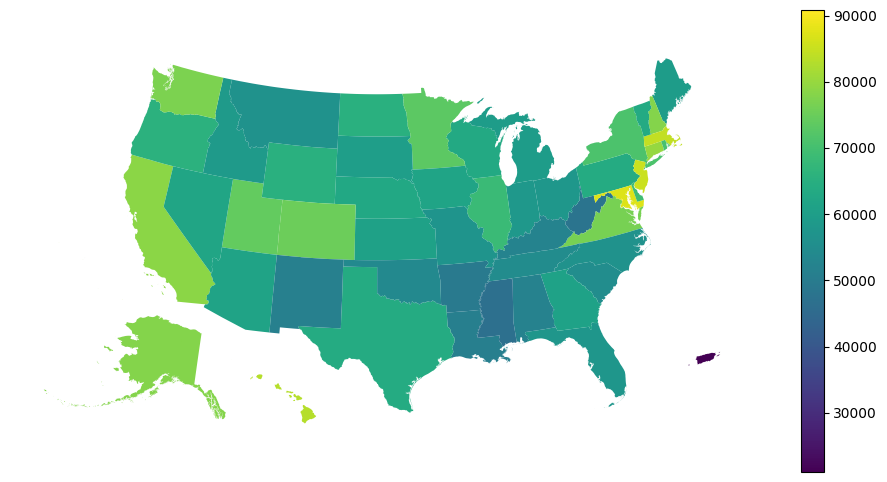

In [9]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states,
    'B19013_001E',
    
    # The **kwargs here are standard Matplotlib **kwargs
    legend=True,
    figsize=(12, 6)
)

ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Styling the Map

- We can add a variety of styling to the map.
- Any args Matplotlib can take, we can pass through.

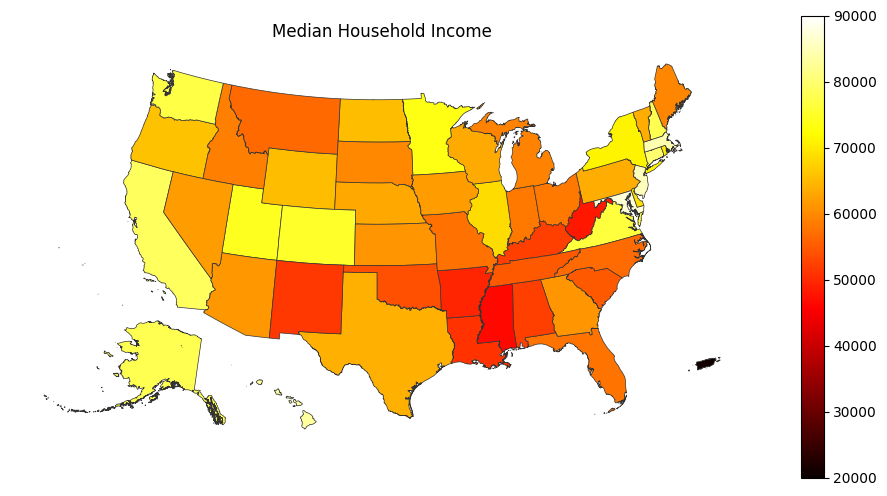

In [10]:
ax = cem.plot_us(
    gdf_all_states,
    'B19013_001E',

    # Styling with Matplotlib **kwargs
    cmap='hot',
    edgecolor='#333',
    linewidth=0.5,
    vmin=20_000,
    vmax=90_000,
        
    legend=True,
    figsize=(12, 6)
)

ax.set_title("Median Household Income")
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## What other Geographies are Available?

### Start with States
Just as we have already done.

In [11]:
gdf_states = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the states, as we have done before
    state="*",
    
    with_geometry=True  
)

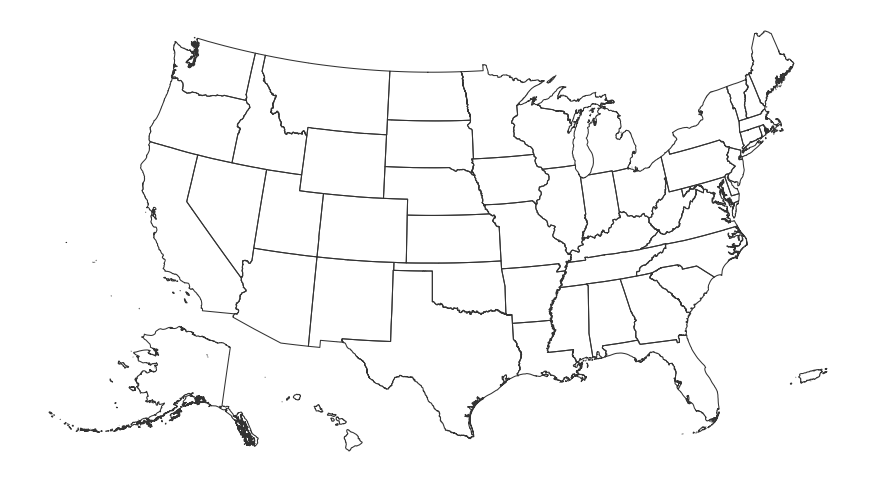

In [12]:
ax = cem.plot_us_boundary(gdf_states, linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

We choose the state but use the wildcard `county='*'`.

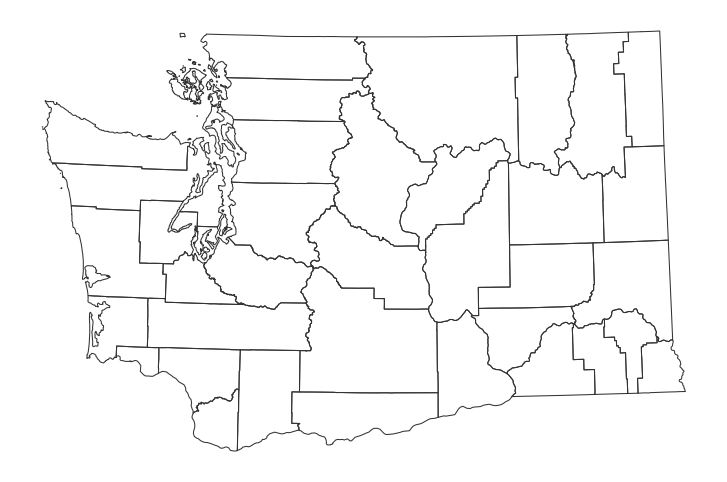

In [13]:
df_counties = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the counties in Washington State.
    state=states.WA,
    county="*",
    
    with_geometry=True
)

ax = cem.plot_map(df_counties.boundary, linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Find King County

In [14]:
df_counties[df_counties['NAME'].str.startswith("King")]

,STATE,COUNTY,NAME,geometry
15,53,033,"King County, Washington","MULTIPOLYGON (((-122.43694 47.66172, -122.42551 47.66471, -122.42269 47.66661, -122.41584 47.67062, -122.40918 47.67174, -122.40928 47.67267, -122.40962 47.67584, -122.40966 47.67622, -122.40784 4..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts

- Tracts typically have 1-5,000 residents
- There are ~80,000 tracts in the U.S.

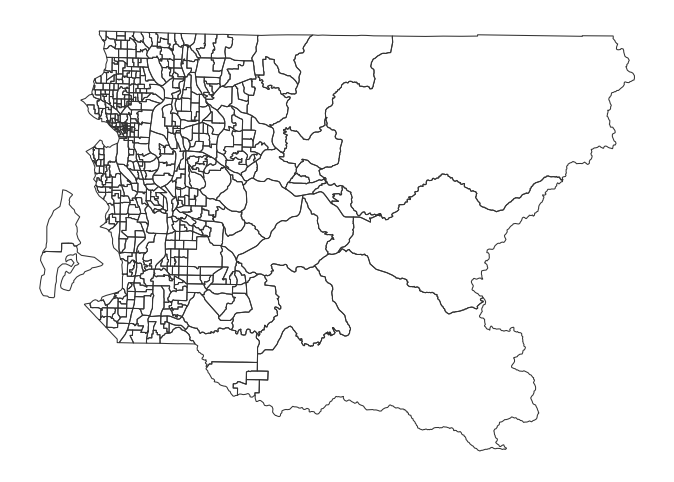

In [15]:
gdf_tracts = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the census tracts in King County
    state=states.WA,
    county="033",
    tract="*",
    
    with_geometry=True
)

ax = cem.plot_map(
    gdf_tracts.boundary,
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)

ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Block Groups

- This is the finest level of geography in ACS data.

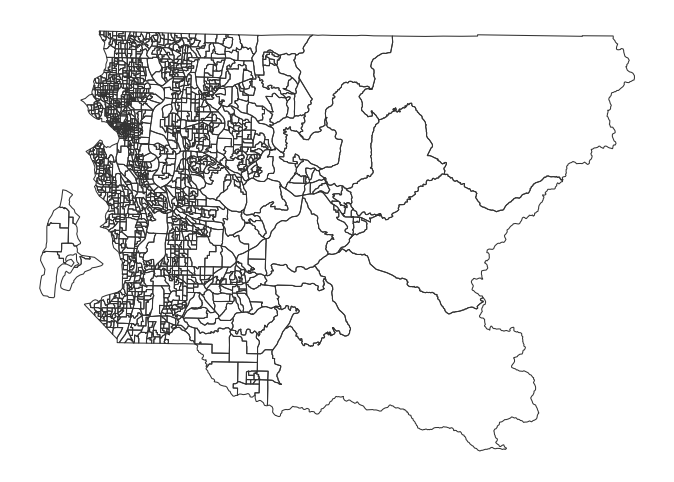

In [16]:
df_block_group = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the block groups in King County, WA
    state=states.WA,
    county="033",
    tract="*",
    block_group="*",
    
    with_geometry=True
)

ax = cem.plot_map(
    df_block_group.boundary, 
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Plot Data at the Block Group Level

In [17]:
from censusdis.values import ALL_SPECIAL_VALUES

gdf_block_group = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
   
    state=states.WA,
    county="033",
    tract="*",
    block_group="*",
    
    with_geometry=True,
    
    # The census API puts in some special values like
    # -666666666 to indicate that data is missing for
    # any of several reasons. For now, we will just
    # set all of these special values to NaN.
    set_to_nan=ALL_SPECIAL_VALUES
)

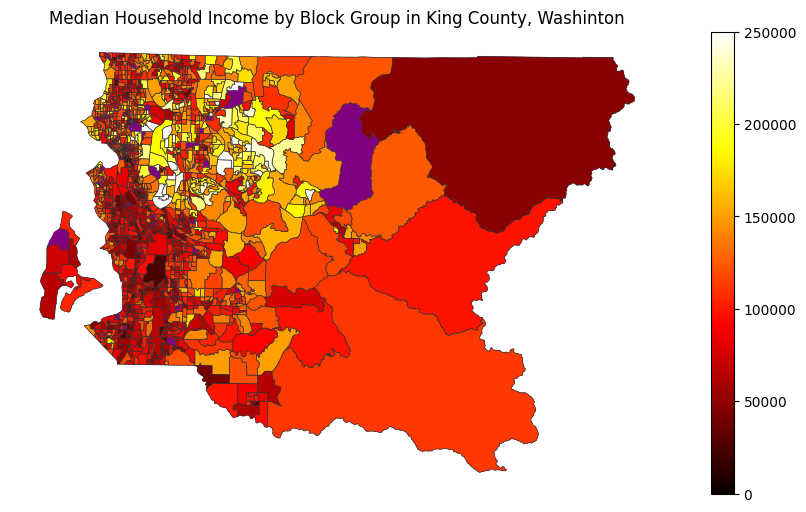

In [18]:
# First plot a neutral background color everywhere.
ax = cem.plot_map(
    gdf_block_group,
    color='purple',
    figsize=(12, 6)
)

# On top of that, dropna() for the cases where data was
# not published, then plot median houssehold income.
ax = cem.plot_map(
    gdf_block_group,
    'B19013_001E',

    cmap='hot',
    edgecolor='#333',
    linewidth=0.5,
    vmin=0,
    vmax=250_000,
        
    legend=True,
    ax=ax,
)

ax.set_title("Median Household Income by Block Group in King County, Washinton")
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *State - County - Tract - Block Group*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<img src="./images/census_geos.png" alt="Census Geographies">

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query for geographies available for a dataset

Each element is a list that tells us a valid combination
of geography `kwargs`.

In [19]:
list(ced.geographies('acs/acs5', 2020))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Places in Washington State

- `['state', 'place']` was one of the entries in the list above. 
- It tells us that `state=` and `place=` are 
valid keywords to describe a geography.
- We will use them in the query below.
- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [20]:
gdf_wa_places = ced.download(
    'acs/acs5',
    2020,
    ['NAME', 'B19013_001E'], 
   
    # Query all places in Washington State.
    state=states.WA,
    place='*',
    
    with_geometry=True
)

gdf_wa_places.head()

,STATE,PLACE,NAME,B19013_001E,geometry
0,53,00100,"Aberdeen city, Washington",42203.0,"MULTIPOLYGON (((-123.69688 47.01895, -123.69662 47.01967, -123.69675 47.02033, -123.69361 47.01978, -123.69048 47.01851, -123.68284 47.01843, -123.68285 47.01641, -123.68628 47.01639, -123.68630 4..."
1,53,00135,"Aberdeen Gardens CDP, Washington",96250.0,"POLYGON ((-123.79560 47.05004, -123.78966 47.05652, -123.78833 47.06084, -123.78531 47.06311, -123.78267 47.06374, -123.78045 47.06603, -123.77875 47.06841, -123.77708 47.06939, -123.77353 47.0702..."
2,53,00275,"Acme CDP, Washington",NaN,"POLYGON ((-122.22005 48.72737, -122.21974 48.72738, -122.21972 48.73110, -122.21779 48.73120, -122.21749 48.73387, -122.21220 48.73404, -122.21361 48.73180, -122.21263 48.72993, -122.21117 48.7293..."
3,53,00380,"Addy CDP, Washington",NaN,"POLYGON ((-117.84418 48.36747, -117.83758 48.36769, -117.83495 48.35856, -117.83205 48.35859, -117.83204 48.35575, -117.83012 48.35573, -117.83008 48.35211, -117.83378 48.35214, -117.84095 48.3521..."
4,53,00800,"Ahtanum CDP, Washington",70179.0,"POLYGON ((-120.67102 46.55110, -120.66928 46.55158, -120.66499 46.55199, -120.65927 46.55417, -120.64983 46.55622, -120.65084 46.55687, -120.64968 46.55755, -120.64958 46.56390, -120.64647 46.5639..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

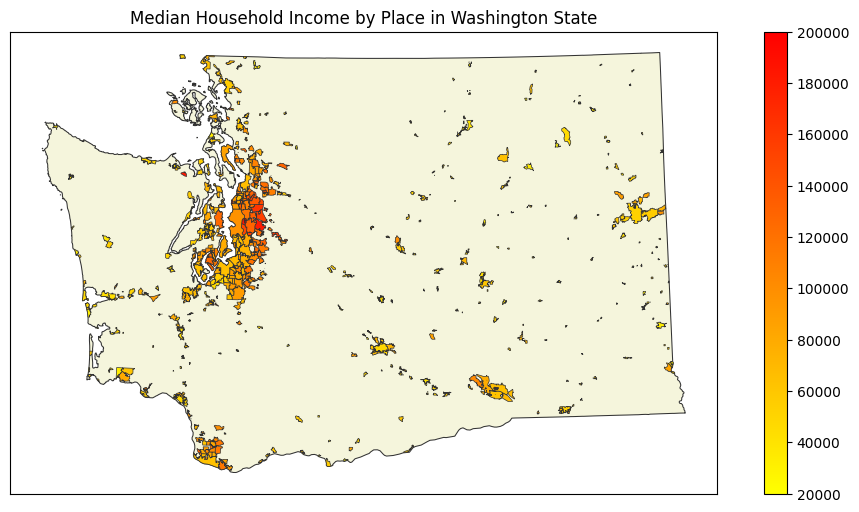

In [21]:
# Plot the whole state in a background color.
gdf_wa_state = gdf_states[gdf_states['STATE']==states.WA]

ax = cem.plot_map(
    gdf_wa_state, linewidth=0.75, color='beige', edgecolor='#333', figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_wa_places,
    'B19013_001E',

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    vmin=20_000,
    vmax=200_000,
        
    figsize=(12, 6),
    legend=True,
    
    ax=ax
)

ax.set_title("Median Household Income by Place in Washington State")
None

#### Or if you prefer a background map

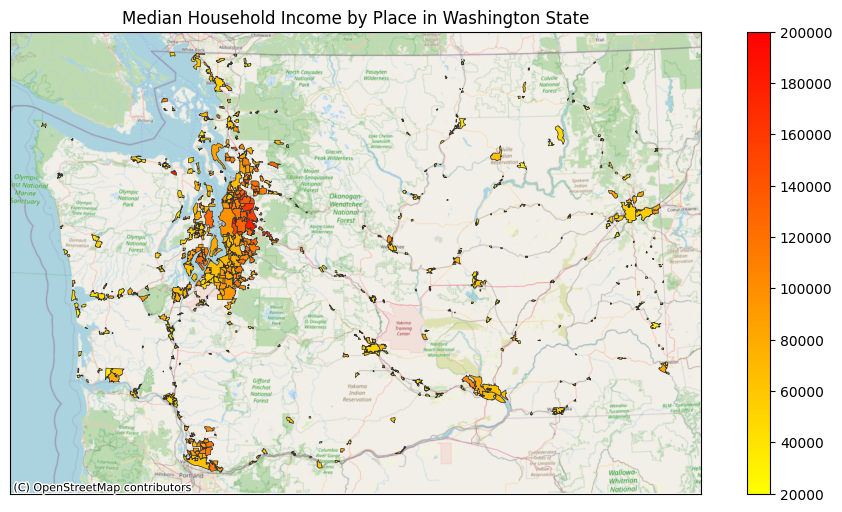

In [22]:
ax = cem.plot_map(
    gdf_wa_places,
    'B19013_001E',

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    vmin=20_000,
    vmax=200_000,
        
    figsize=(12, 6),
    legend=True,
    
    # Add a background map from 
    # Open Street Maps
    with_background=True
)

ax.set_title("Median Household Income by Place in Washington State")
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query Core Based Statistical Areas (CSAs) in the United States

- Metropolitan (population 50,000+) and Micropolitan (population 10,000-50,000) areas are collectively know as [Core Based Statistical Areas](https://en.wikipedia.org/wiki/Core-based_statistical_area) (CBSAs)
- Our list of geographies included `['metropolitan_statistical_area_micropolitan_statistical_area']`
- Note that this was standalone, not nested in a state like `place` was.
- CBSAs represent greater micro/metropolitan areas
- They may cross state lines

In [23]:
gdf_cbsa = ced.download(
    # These first three arguments are positional and required
    # so sometimes I skip naming them.
    dataset='acs/acs5',
    vintage=2020,
    
    # Note: 'B03002_001E' is the variable for total population.
    download_variables=['NAME', 'B19013_001E', 'B03002_001E'], 
   
    # Query all CBSAs in the country.
    metropolitan_statistical_area_micropolitan_statistical_area='*',
    
    with_geometry=True
)

In [24]:
# We want the n largest CBSAs by population.
n = 100
gdf_large_cbsa = gdf_cbsa.nlargest(n, 'B03002_001E')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Largest CBSAs

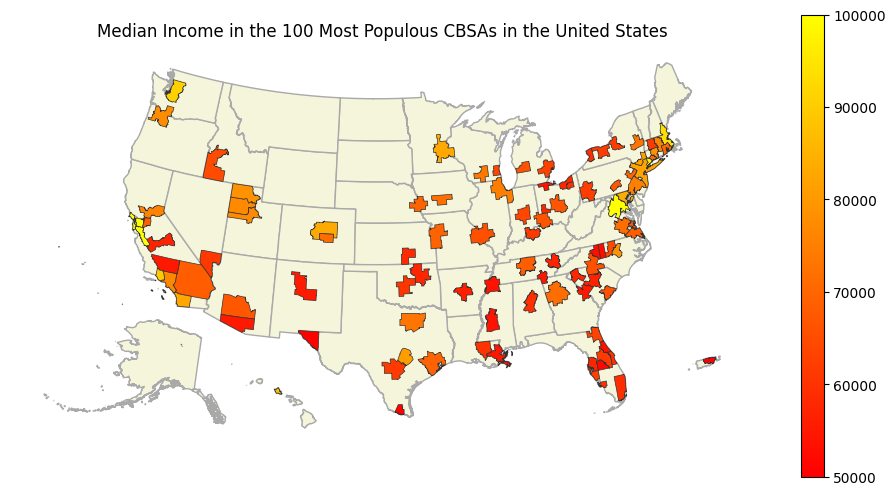

In [25]:
ax = cem.plot_us(
    gdf_states,
    color='beige',
    edgecolor='darkgrey',
    figsize=(12,6)
)

ax = cem.plot_us(
    gdf_large_cbsa,
    'B19013_001E',

    cmap='autumn',
    edgecolor='#333',
    linewidth=0.5,
    vmin=50_000,
    vmax=100_000,
        
    legend=True,
    
    ax=ax
)

ax.axis('off')
_ = ax.set_title(f'Median Income in the {n} Most Populous CBSAs in the United States')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Not all data sets support the same geographies

Let's look at `acs/acs5` and `dec/pl` which is a decennial [Public Law 94-171](https://www.census.gov/programs-surveys/decennial-census/data/datasets.html) data 
set used for redistricting for federal and state legislative districts.

The newest vintage of `dec/pl` has more geographies than `acs/acs5`, but the older vintages
have fewer. 

The ACS has had varied numbers of geographies in over the years.

In [26]:
acs5_geos = {
    vintage: len(ced.geographies('acs/acs5', vintage))
    for vintage in range(2010, 2021)
}

acs5_geos

{2010: 81,
 2011: 82,
 2012: 80,
 2013: 87,
 2014: 87,
 2015: 87,
 2016: 87,
 2017: 85,
 2018: 85,
 2019: 87,
 2020: 87}

In [27]:
dec_pl_geos = {
    vintage: len(ced.geographies('dec/pl', vintage))
    for vintage in range(2000, 2021, 10)
}

dec_pl_geos

{2000: 28, 2010: 83, 2020: 96}

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Discovering Variables - More Metadata

Those queries were fun, but 
- how did we know `acs/acs5` was the name of the ACS 5 data set?
- how did we know that median household income was represented by the variable, `'B19013_001E'`? 
- how do we explore groups and individual variables to find variables that might interest us?

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Discovering all the Datasets

In [28]:
df_datasets = ced.variables.all_data_sets()
df_datasets

,YEAR,DATASET,TITLE,DESCRIPTION
0,1986,cbp,1986 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment..."
1,1987,cbp,1987 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment..."
2,1988,cbp,1988 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment..."
3,1989,cbp,1989 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishment..."
4,1989,cps/basic/apr,Apr 1989 Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployment, and other characteristics of the general labor force, of the population as a whole, and of various subgroups of the population. Monthly labor forc..."
...,...,...,...,...
1331,timeseries,timeseries/pseo/earnings,Post-Secondary Employment Outcomes (PSEO): Post-Secondary Employment Outcomes (PSEO) - Earnings,Post-Secondary Employment Outcomes (PSEO) are experimental tabulations developed by researchers at the U.S. Census Bureau. PSEO data provide earnings and employment outcomes for college and univer...
1332,timeseries,timeseries/pseo/flows,Post-Secondary Employment Outcomes (PSEO): Post-Secondary Employment Outcomes (PSEO) - Flows,Post-Secondary Employment Outcomes (PSEO) are experimental tabulations developed by researchers at the U.S. Census Bureau. PSEO data provide earnings and employment outcomes for college and univer...
1333,timeseries,timeseries/qwi/rh,Time Series Longitudinal Employer-Household Dynamics - QWI: Race by Ethnicity,"The Quarterly Workforce Indicators (QWI) are a set of economic indicators including employment, job creation, earnings, and other measures of employment flows. The QWI are reported using detailed ..."
1334,timeseries,timeseries/qwi/sa,Time Series Longitudinal Employer-Household Dynamics - QWI: Sex by Age,"The Quarterly Workforce Indicators (QWI) are a set of economic indicators including employment, job creation, earnings, and other measures of employment flows. The QWI are reported using detailed ..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Find ACS 5

In [29]:
df_datasets[df_datasets['TITLE'].str.contains('American Community Survey: 5-Year')].head()

,YEAR,DATASET,TITLE,DESCRIPTION
461,2009,acs/acs5,American Community Survey: 5-Year Estimates: Detailed Tables 5-Year,The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a br...
462,2009,acs/acs5/profile,American Community Survey: 5-Year Estimates: Data Profiles 5-Year,The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a br...
463,2009,acs/acs5/pums,2005-2009 American Community Survey: 5-Year Estimates - Public Use Microdata Sample,"The American Community Survey (ACS) Public Use Microdata Sample (PUMS) contains a sample of responses to the ACS. The ACS PUMS dataset includes variables for nearly every question on the survey, a..."
464,2009,acs/acs5/pumspr,2005-2009 American Community Survey: 5-Year Estimates - Puerto Rico Public Use Microdata Sample,"The Public Use Microdata Sample (PUMS) for Puerto Rico (PR) contains a sample of responses to the Puerto Rico Community Survey (PRCS). The PRCS is similar to, but separate from, the American Commu..."
500,2010,acs/acs5/aian,American Community Survey: 5-Year Estimates: American Indian and Alaska Native Detailed Tables 5-Year,"The American Indian and Alaska Native (AIAN) tables are released every five years. They are available for selected tribal populations, with more detailed tribal categories compared to those in the..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## All the Groups of Variables in a Data Set for a Given Vintage

In [30]:
df_groups = ced.variables.all_groups('acs/acs5', 2020)

df_groups

,DATASET,YEAR,GROUP,DESCRIPTION
0,acs/acs5,2020,B01001,SEX BY AGE
1,acs/acs5,2020,B01001A,SEX BY AGE (WHITE ALONE)
2,acs/acs5,2020,B01001B,SEX BY AGE (BLACK OR AFRICAN AMERICAN ALONE)
3,acs/acs5,2020,B01001C,SEX BY AGE (AMERICAN INDIAN AND ALASKA NATIVE ALONE)
4,acs/acs5,2020,B01001D,SEX BY AGE (ASIAN ALONE)
...,...,...,...,...
1135,acs/acs5,2020,C27014,PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE
1136,acs/acs5,2020,C27016,HEALTH INSURANCE COVERAGE STATUS BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE
1137,acs/acs5,2020,C27017,PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE
1138,acs/acs5,2020,C27018,PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Remember dec/pl had more geometries?

- What about groups of variables? 
  - It has a lot less.

In [31]:
df_groups_dec_pl = ced.variables.all_groups('dec/pl', 2020)

df_groups_dec_pl

,DATASET,YEAR,GROUP,DESCRIPTION
0,dec/pl,2020,H1,OCCUPANCY STATUS
1,dec/pl,2020,P1,RACE
2,dec/pl,2020,P2,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE"
3,dec/pl,2020,P3,RACE FOR THE POPULATION 18 YEARS AND OVER
4,dec/pl,2020,P4,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE FOR THE POPULATION 18 YEARS AND OVER"
5,dec/pl,2020,P5,GROUP QUARTERS POPULATION BY MAJOR GROUP QUARTERS TYPE


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Finding Interesting Groups

In [32]:
df_groups[df_groups['DESCRIPTION'].str.contains('MEDIAN HOUSEHOLD INCOME')]

,DATASET,YEAR,GROUP,DESCRIPTION
494,acs/acs5,2020,B19013,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)
495,acs/acs5,2020,B19013A,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE HOUSEHOLDER)
496,acs/acs5,2020,B19013B,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)
497,acs/acs5,2020,B19013C,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)
498,acs/acs5,2020,B19013D,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)
499,acs/acs5,2020,B19013E,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER)
500,acs/acs5,2020,B19013F,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER)
501,acs/acs5,2020,B19013G,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES HOUSEHOLDER)
502,acs/acs5,2020,B19013H,"MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE, NOT HISPANIC OR LATINO HOUSEHOLDER)"
503,acs/acs5,2020,B19013I,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS) (HISPANIC OR LATINO HOUSEHOLDER)


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Variables in a Group

This particular group has only one variable.

In [33]:
ced.variables.all_variables('acs/acs5', 2020, 'B19013')

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,B19013,B19013_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars),NaN,None


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## A Group with Several Variables

In [34]:
ced.variables.all_variables('acs/acs5', 2020, 'B25119')

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,acs/acs5,B25119,B25119_001E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --!!Total:,NaN,None
1,2020,acs/acs5,B25119,B25119_002E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --!!Total:!!Owner occupied (dollars),NaN,None
2,2020,acs/acs5,B25119,B25119_003E,Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --!!Total:!!Renter occupied (dollars),NaN,None


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Variables in a Group as a Tree

In many groups, 

- variables and their values are aggregated in a tree
- the tree is implicitly encoded as root-to-note paths in each variable's label
  - Uses `!!` and `:`  
- `ced.variables.group_tree` can query the structure of the tree
  - Labels are parsed for us

In [35]:
ced.variables.group_tree('acs/acs5', 2020, "B25119")

+ Estimate
    + Median household income in the past 12 months (in 2020 inflation-adjusted dollars) --
        + Total: (B25119_001E)
            + Owner occupied (dollars) (B25119_002E)
            + Renter occupied (dollars) (B25119_003E)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Deeper Trees

Here is an example of a group that has a tree of variables that is 
three to four levels deep, not just two.

In [36]:
ced.variables.group_tree('dec/pl', 2020, 'P2')

+  
    + Total: (P2_001N)
        + Hispanic or Latino (P2_002N)
        + Not Hispanic or Latino: (P2_003N)
            + Population of one race: (P2_004N)
                + White alone (P2_005N)
                + Black or African American alone (P2_006N)
                + American Indian and Alaska Native alone (P2_007N)
                + Asian alone (P2_008N)
                + Native Hawaiian and Other Pacific Islander alone (P2_009N)
                + Some Other Race alone (P2_010N)
            + Population of two or more races: (P2_011N)
                + Population of two races: (P2_012N)
                    + White; Black or African American (P2_013N)
                    + White; American Indian and Alaska Native (P2_014N)
                    + White; Asian (P2_015N)
                    + White; Native Hawaiian and Other Pacific Islander (P2_016N)
                    + White; Some Other Race (P2_017N)
                    + Black or African American; American Indian and Alaska N

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Get a List of Leaves

In [37]:
ced.variables.group_leaves('acs/acs5', 2020, "B25119")

['B25119_002E', 'B25119_003E']

In [38]:
ced.variables.group_leaves('dec/pl', 2020, 'P2')

['P2_002N',
 'P2_005N',
 'P2_006N',
 'P2_007N',
 'P2_008N',
 'P2_009N',
 'P2_010N',
 'P2_013N',
 'P2_014N',
 'P2_015N',
 'P2_016N',
 'P2_017N',
 'P2_018N',
 'P2_019N',
 'P2_020N',
 'P2_021N',
 'P2_022N',
 'P2_023N',
 'P2_024N',
 'P2_025N',
 'P2_026N',
 'P2_027N',
 'P2_029N',
 'P2_030N',
 'P2_031N',
 'P2_032N',
 'P2_033N',
 'P2_034N',
 'P2_035N',
 'P2_036N',
 'P2_037N',
 'P2_038N',
 'P2_039N',
 'P2_040N',
 'P2_041N',
 'P2_042N',
 'P2_043N',
 'P2_044N',
 'P2_045N',
 'P2_046N',
 'P2_047N',
 'P2_048N',
 'P2_050N',
 'P2_051N',
 'P2_052N',
 'P2_053N',
 'P2_054N',
 'P2_055N',
 'P2_056N',
 'P2_057N',
 'P2_058N',
 'P2_059N',
 'P2_060N',
 'P2_061N',
 'P2_062N',
 'P2_063N',
 'P2_064N',
 'P2_066N',
 'P2_067N',
 'P2_068N',
 'P2_069N',
 'P2_070N',
 'P2_071N',
 'P2_073N']

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query All Variables in a Group

In [39]:
df_west_coast_income_by_tenure = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are in this group
    group="B25119",
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income_by_tenure

,STATE,NAME,B25119_001E,B25119_002E,B25119_003E
0,06,California,78672,102875,55241
1,41,Oregon,65667,82264,43802
2,53,Washington,77006,95075,52022


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Just the Leaves of a Group

In [40]:
df_west_coast_income_by_tenure_leaves = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are in this group
    leaves_of_group="B25119",
    
    state=[states.WA, states.OR, states.CA]
)

df_west_coast_income_by_tenure_leaves

,STATE,NAME,B25119_002E,B25119_003E
0,06,California,102875,55241
1,41,Oregon,82264,43802
2,53,Washington,95075,52022


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Leaves of a larger tree of variables

This is an example of the kind of case where `leaves_of_group=` 
is really useful. It allows us to get a count of every racial
and ethnic group without any of the intermediate aggregations.

In [41]:
df_west_coast_demographics = ced.download(
    dataset='dec/pl',
    vintage=2020,
    
    # Only one explicitly specified variable.
    download_variables=['NAME'],  
    
    # Get all the variables that are leaves of this group
    leaves_of_group="P2",
    
    state=[states.WA, states.OR, states.CA]
)

In [42]:
df_west_coast_demographics

,STATE,NAME,P2_002N,P2_005N,P2_006N,P2_007N,P2_008N,P2_009N,P2_010N,P2_013N,...,P2_062N,P2_063N,P2_064N,P2_066N,P2_067N,P2_068N,P2_069N,P2_070N,P2_071N,P2_073N
0,06,California,15579652,13714587,2119286,156085,5978795,138167,223929,220162,...,35,62,15,683,406,65,71,21,1,130
1,41,Oregon,588757,3036158,78658,42042,191797,18197,22962,29744,...,1,0,0,105,38,3,12,11,0,29
2,53,Washington,1059213,4918820,296170,91191,723062,62490,43221,75362,...,5,12,2,218,64,26,24,12,12,29


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Leaf data, diversity, and integration

The `dis` in `censusdis` stands for Diversity, Integration, and Segregation.
Leaves of groups that count membership in racial and/or demographic 
groups are often inputs for DIS calculations.

In [43]:
df_king_county_demographic_blocks = ced.download(
    dataset='dec/pl',
    vintage=2020,
    download_variables=[],  
    
    # Get all the variables that are leaves of this group
    leaves_of_group="P2",
    
    state=states.WA,
    county="033",
    tract="*",
    block="*"
)

In [44]:
df_king_county_demographic_blocks.shape

(27686, 68)

In [45]:
import divintseg
import geopandas as gpd

In [46]:
df_di = divintseg.di(
    df_king_county_demographic_blocks,
    by=['STATE', 'COUNTY', 'TRACT'],
    over='BLOCK'
).reset_index()

In [47]:
df_di

,STATE,COUNTY,TRACT,diversity,integration
0,53,033,000101,0.754837,0.709493
1,53,033,000102,0.630347,0.585771
2,53,033,000201,0.654499,0.634458
3,53,033,000202,0.617814,0.581717
4,53,033,000300,0.601878,0.556926
...,...,...,...,...,...
490,53,033,032704,0.347213,0.313582
491,53,033,032705,0.322257,0.306773
492,53,033,032706,0.286983,0.255064
493,53,033,032800,0.258139,0.213807


In [48]:
gdf_di = gpd.GeoDataFrame(gdf_tracts.merge(df_di, on=['STATE', 'COUNTY', 'TRACT']))

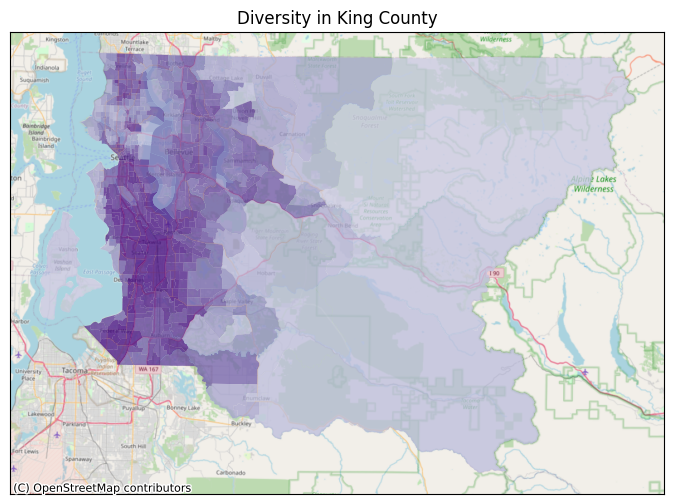

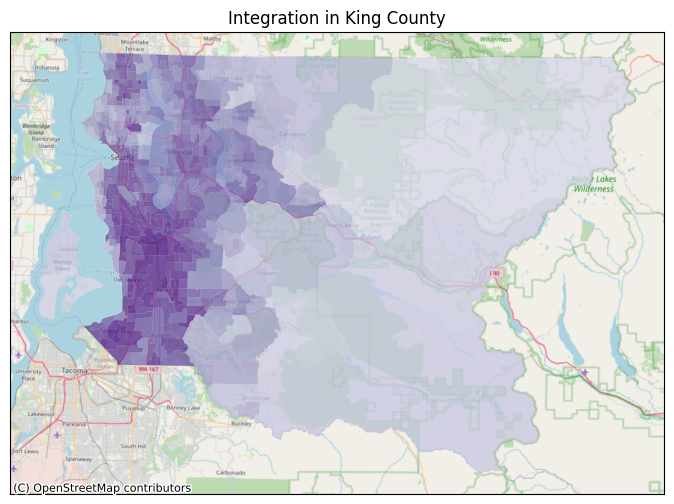

In [49]:
for col in ['diversity', 'integration']:
    ax = cem.plot_map(
        gdf_di,
        col,

        cmap="Purples",

        figsize=(12, 6),

        alpha=0.75,
        
        vmax=0.8,
        vmin=0.0,

        with_background=True,
    )

    ax.set_title(f"{col.title()} in King County")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# BREAK - 5 minutes to stretch

## When we come back: Locating child poverty in Newark, NJ.

## Additional resources to explore

- ## This tutorial:  https://github.com/vengroff/censusdis-tutorial
- ## Censusdis on github: https://github.com/vengroff/censusdis
- ## Sample notebooks: https://github.com/vengroff/censusdis/tree/main/notebooks
- ## Interactive map of diversity and integration at the census tract level: http://di-map.datapinions.com/
- ## My blog with additional applications: https://datapinions.com/
- ## South Orange Maplewood Community Coalition on Race: https://www.communitycoalitiononrace.org/
- ## Two Sigma Data Clinic blog: 
